<a href="https://colab.research.google.com/github/GoncalSousa20/NAS_IPL/blob/main/plotings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-5-be3d78af02a1>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', len(file_names))


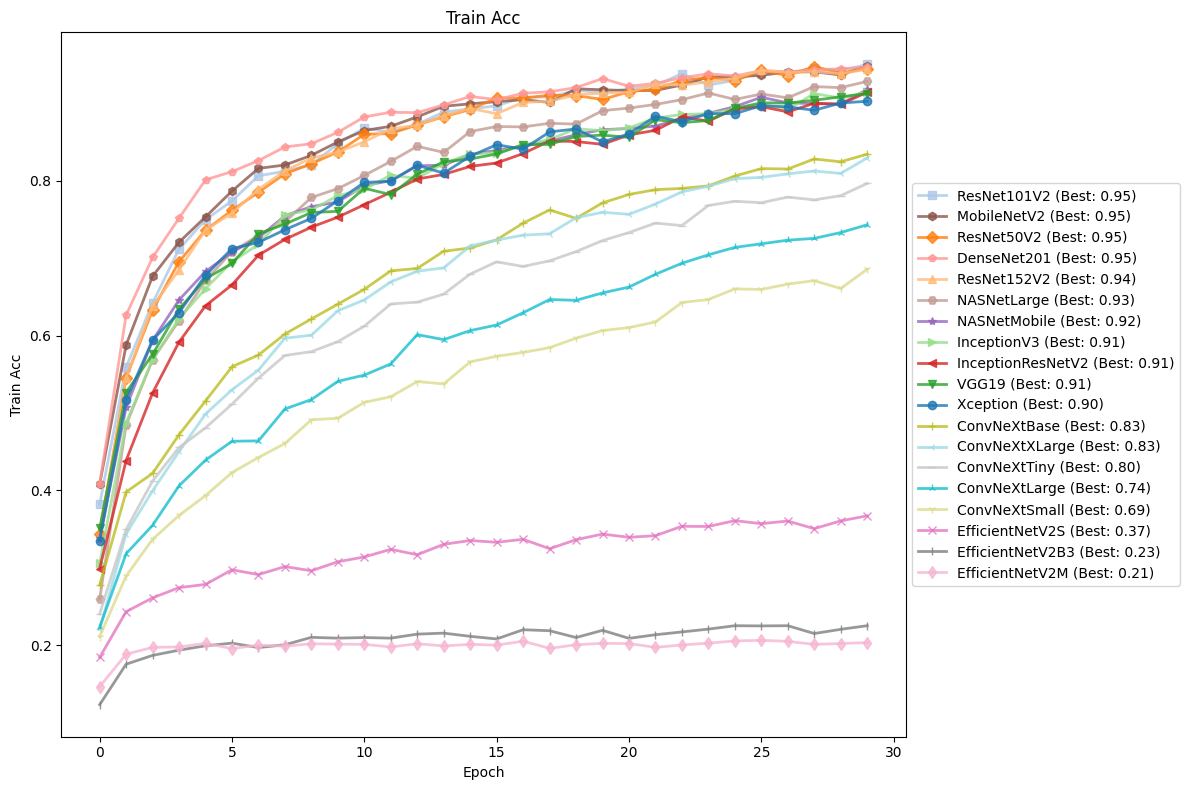

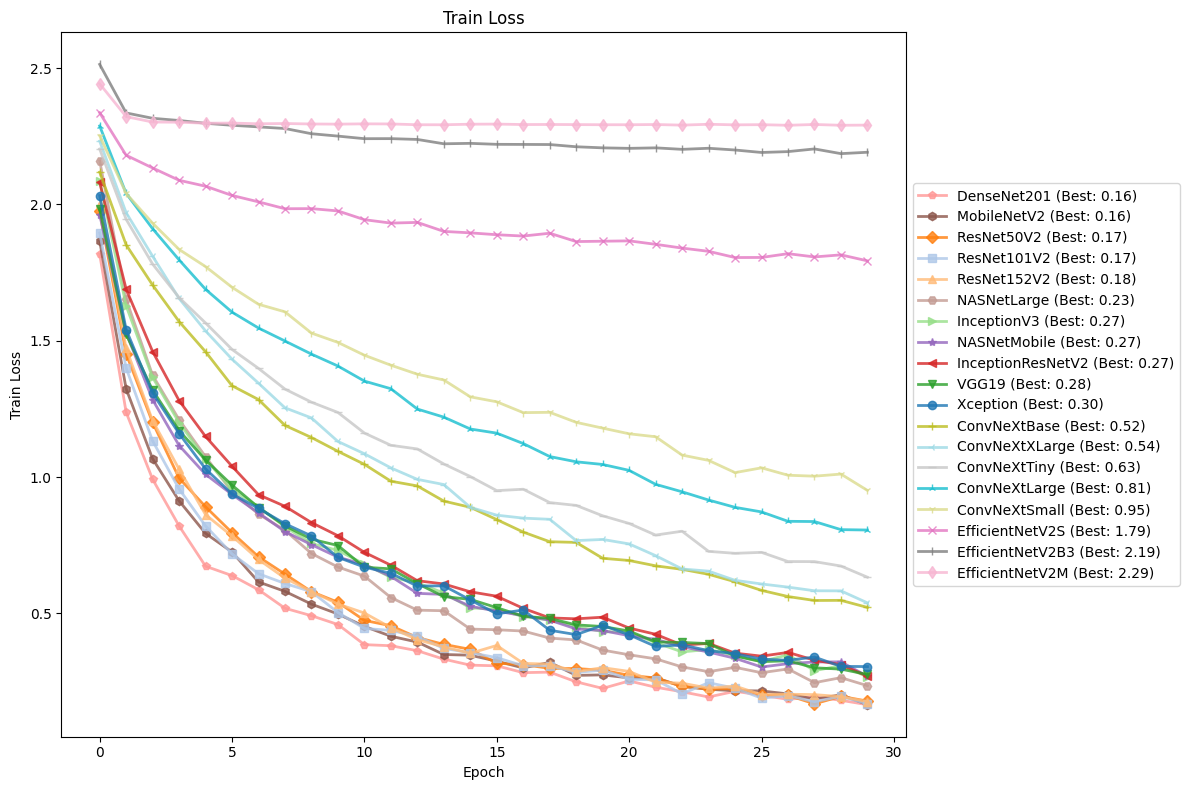

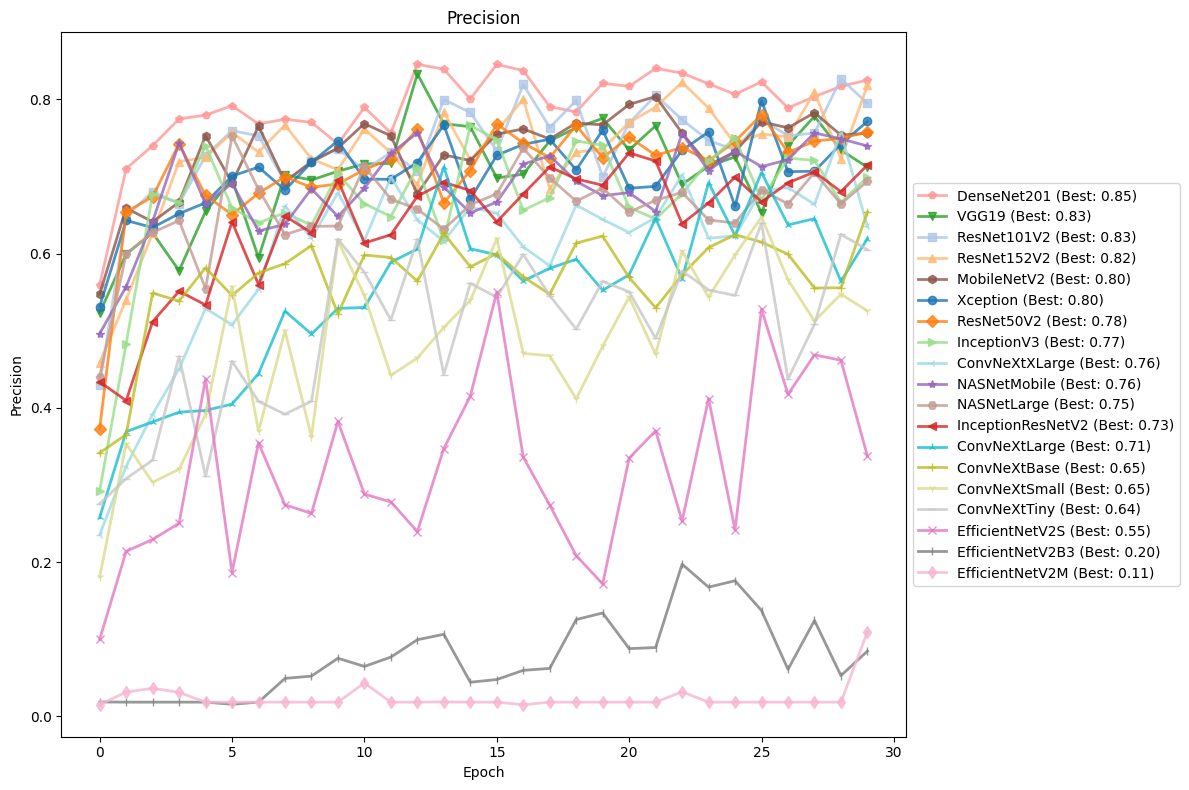

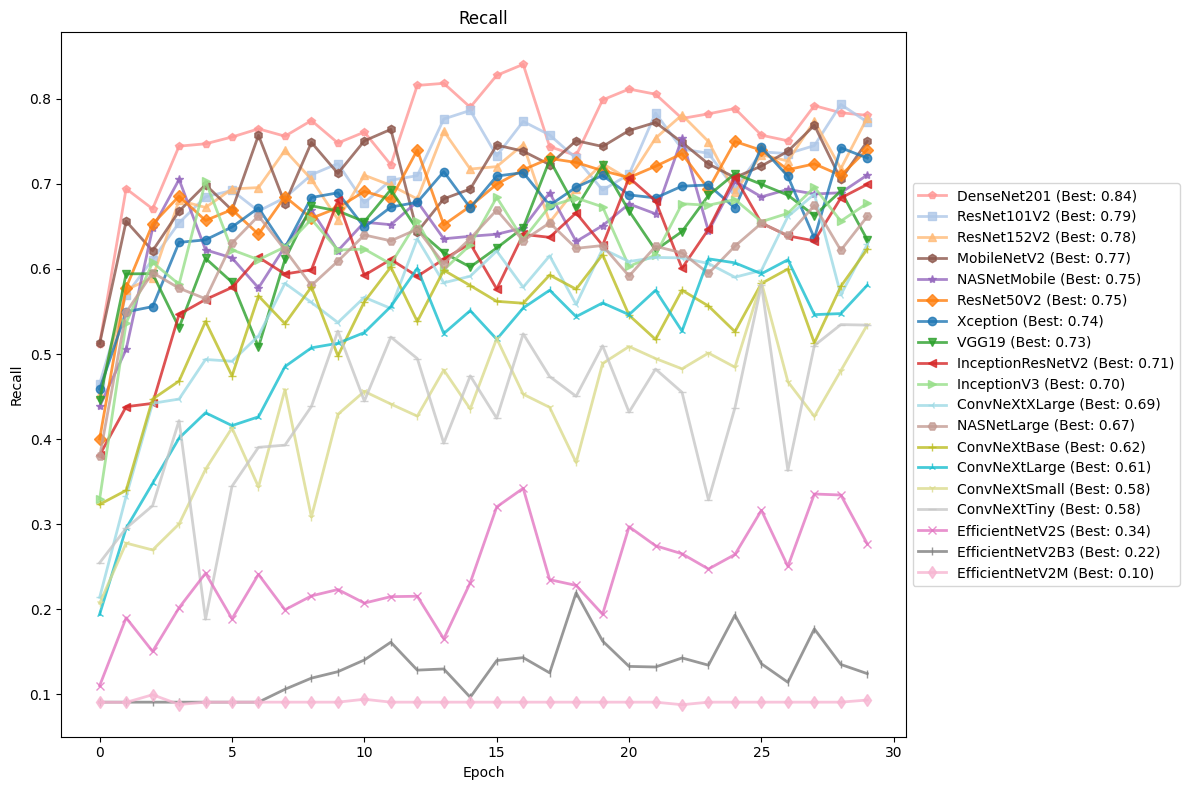

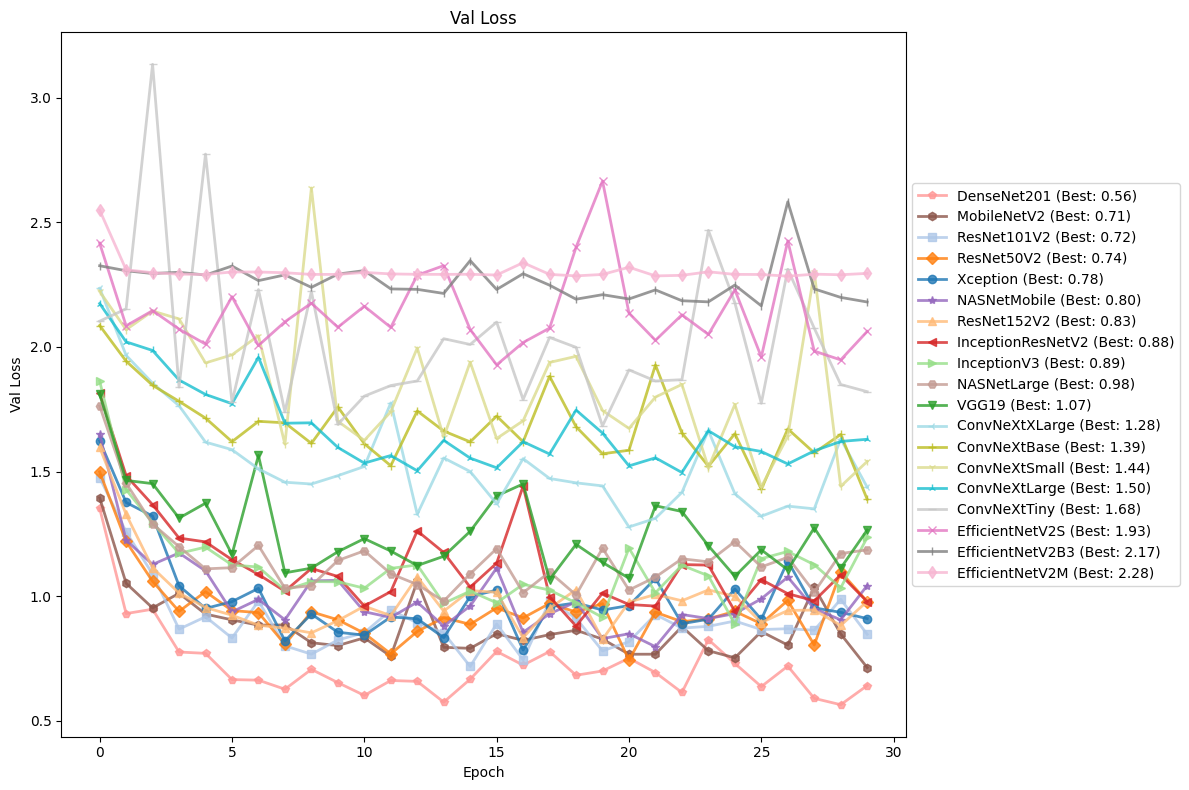

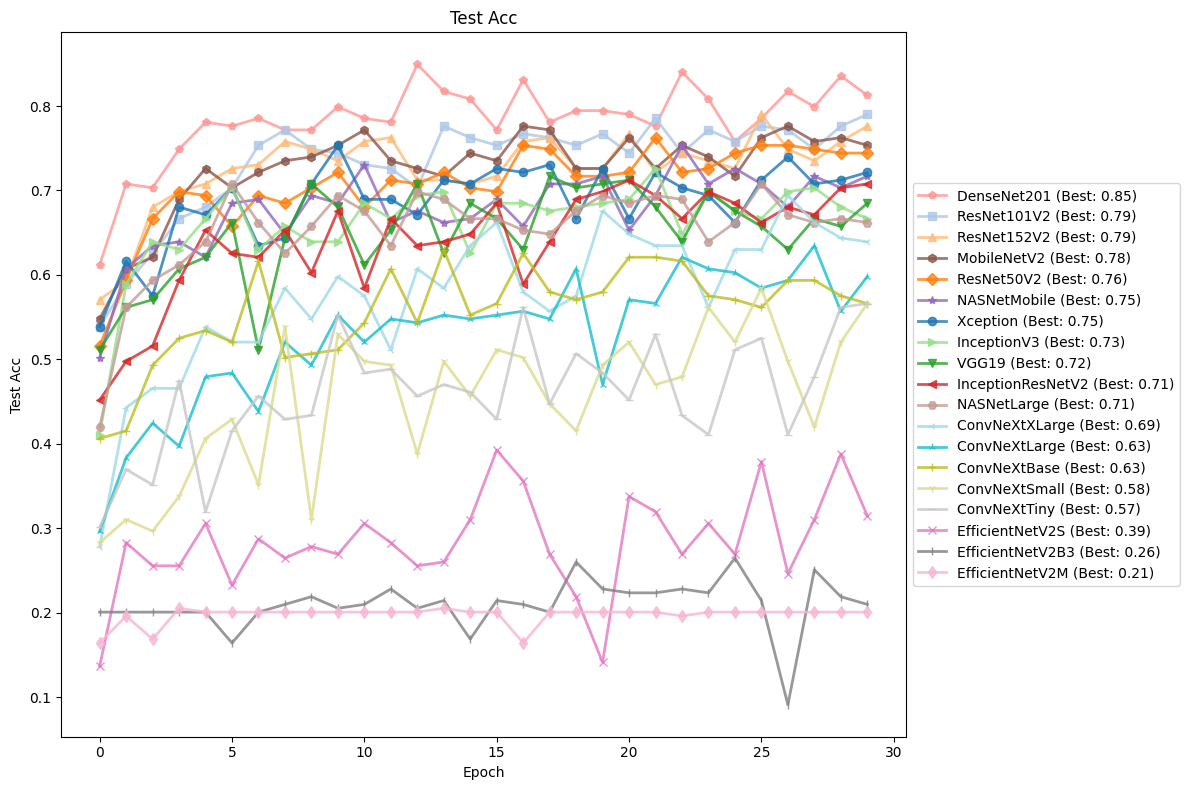

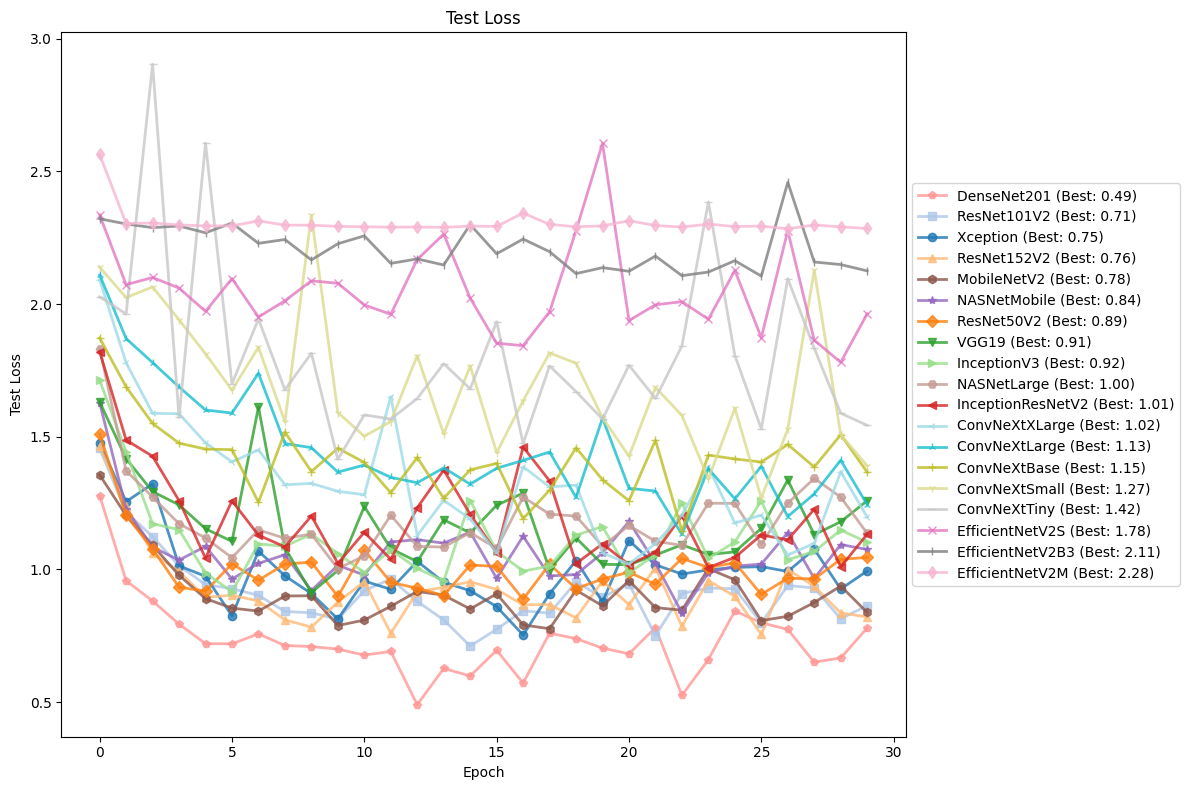

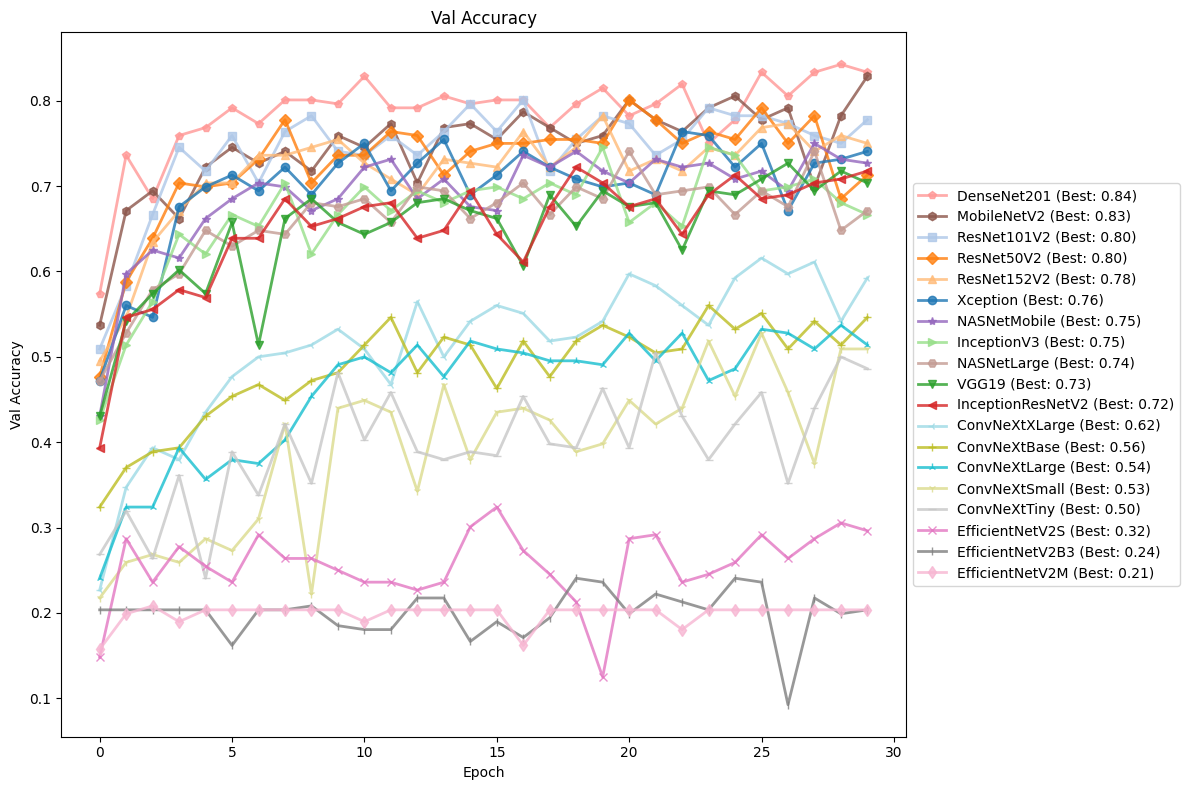

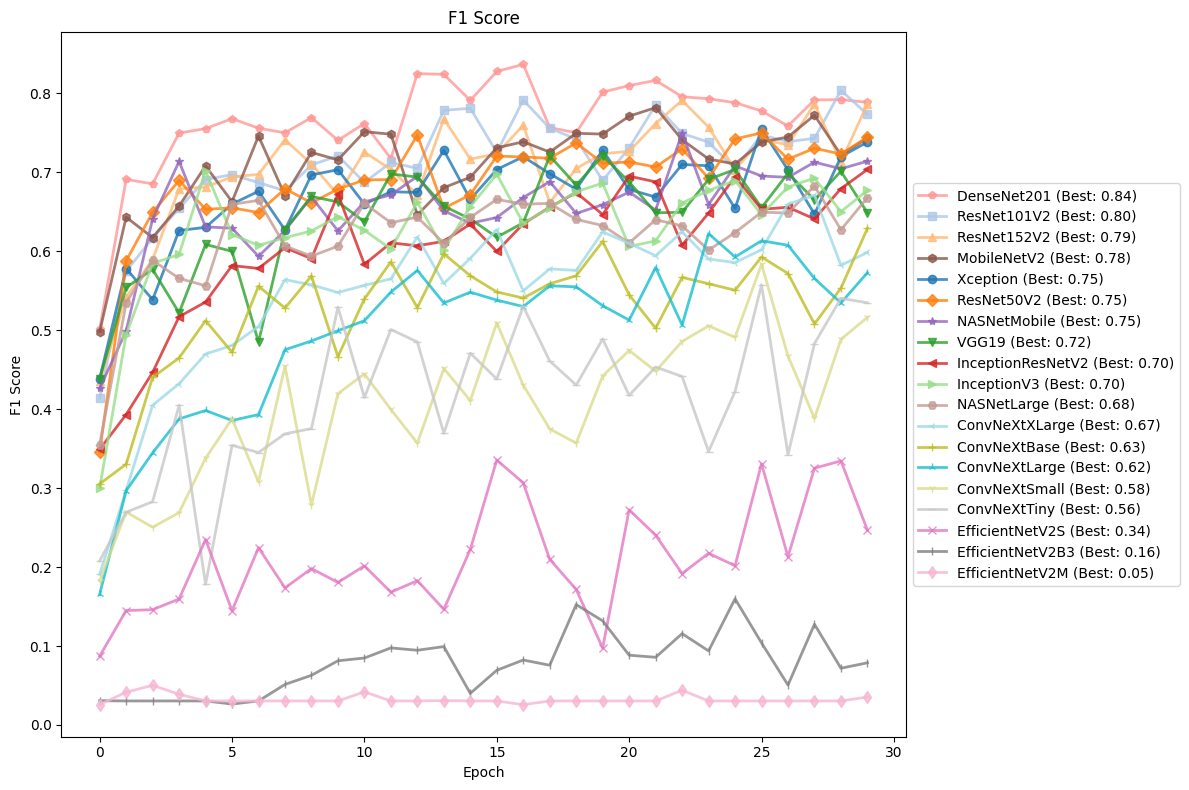

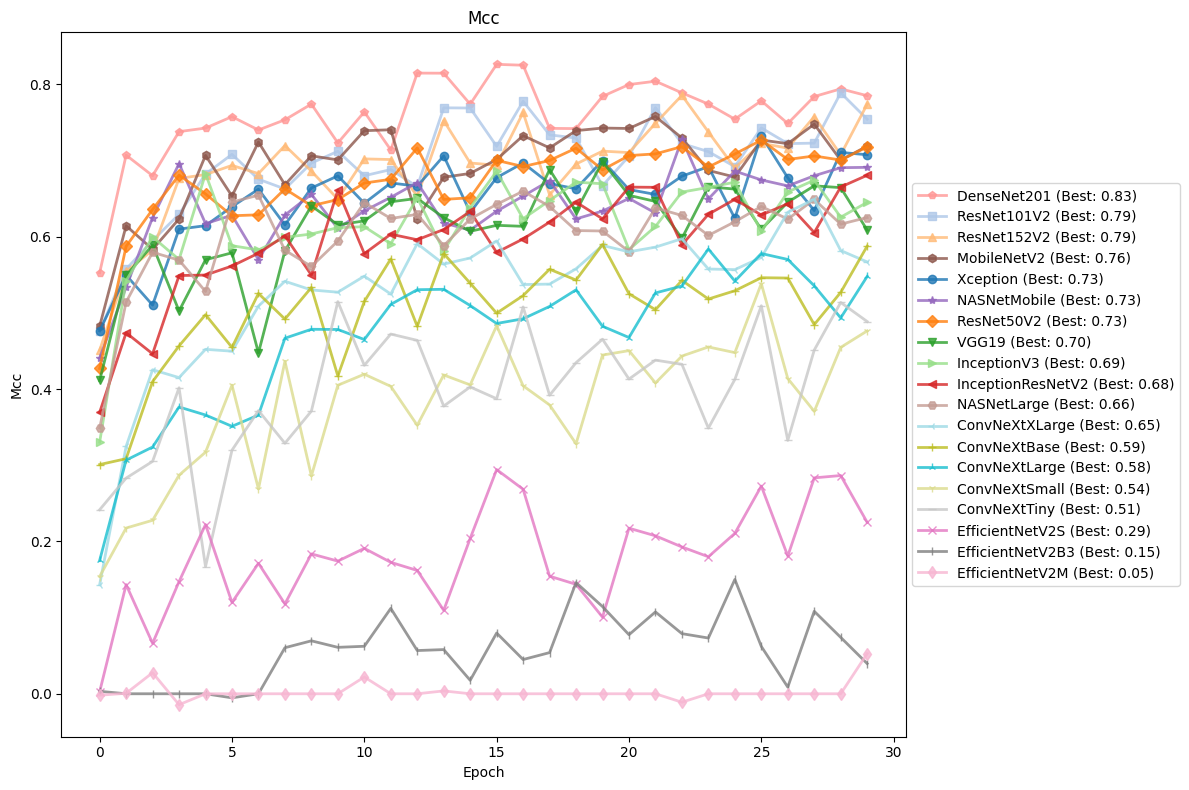

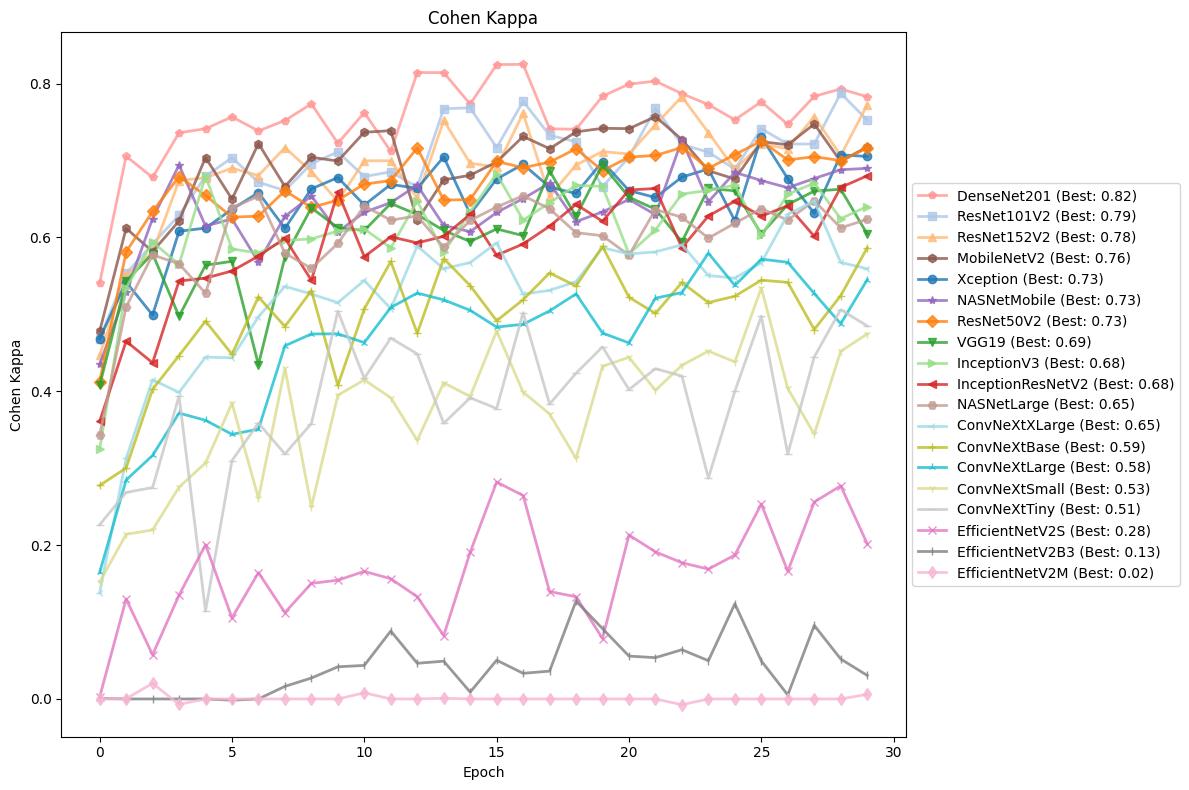

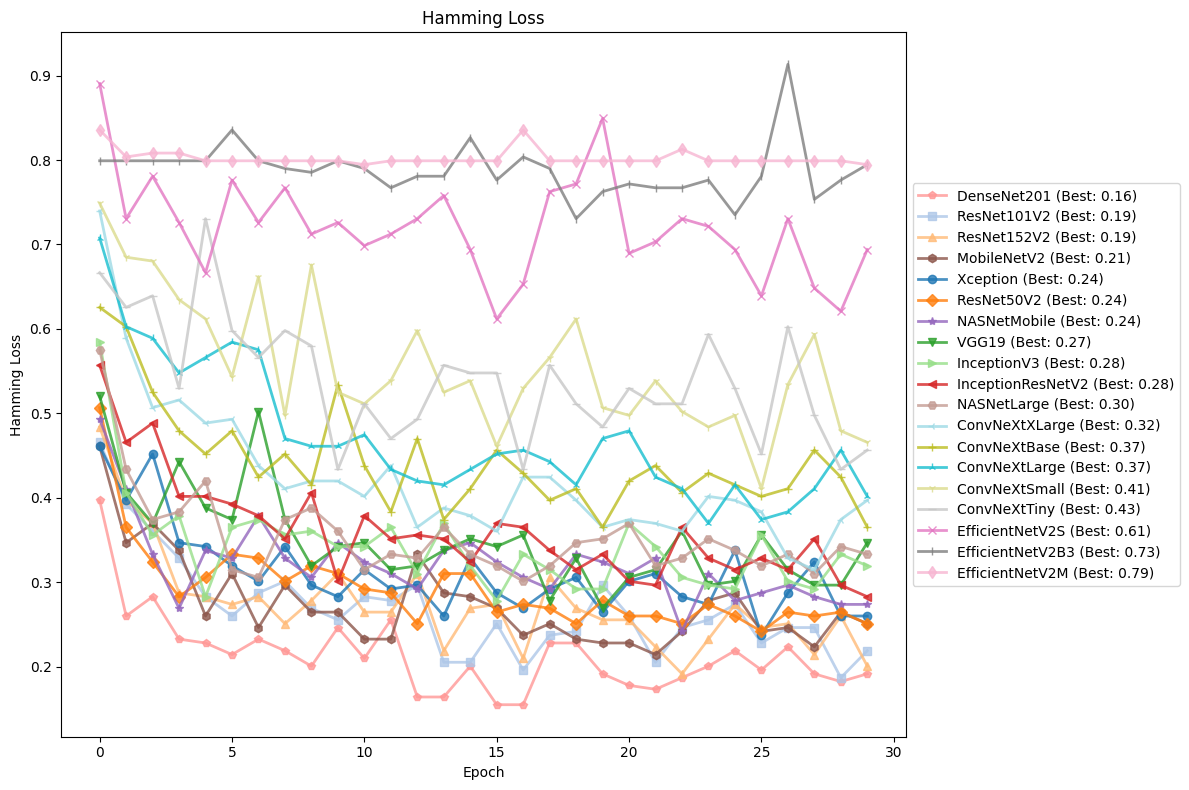

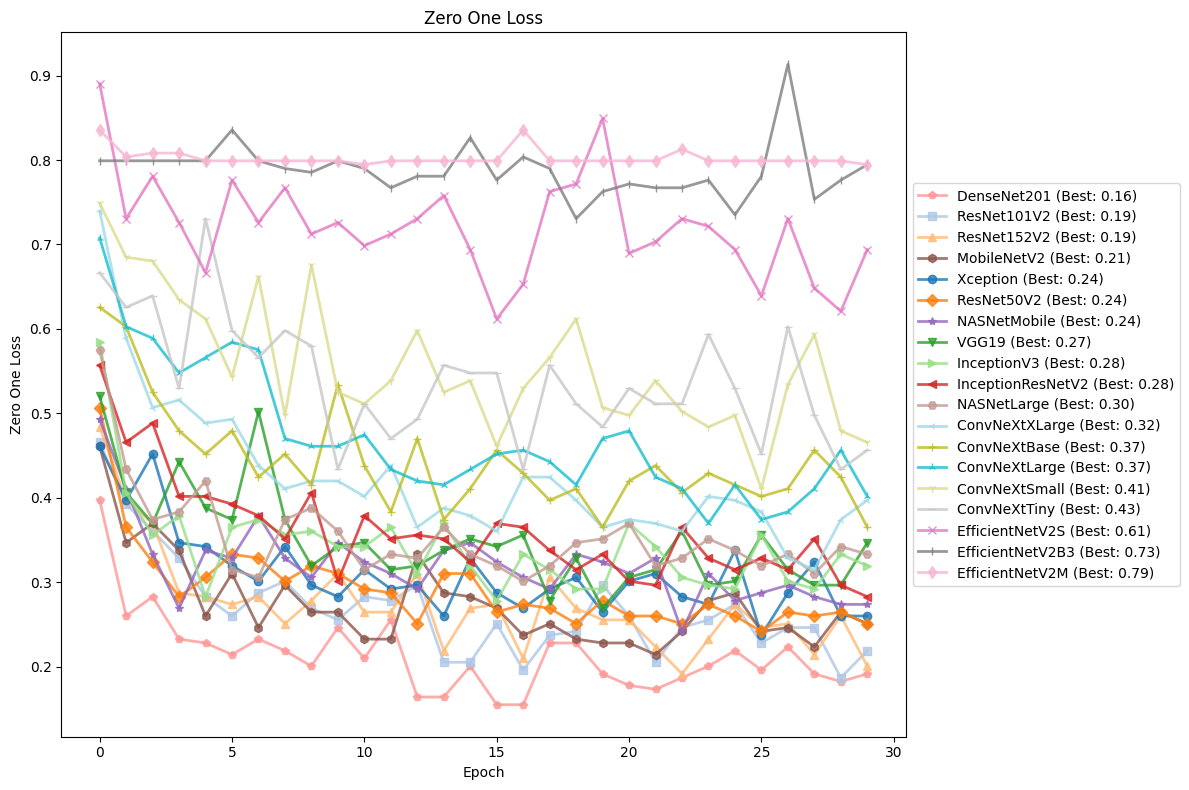

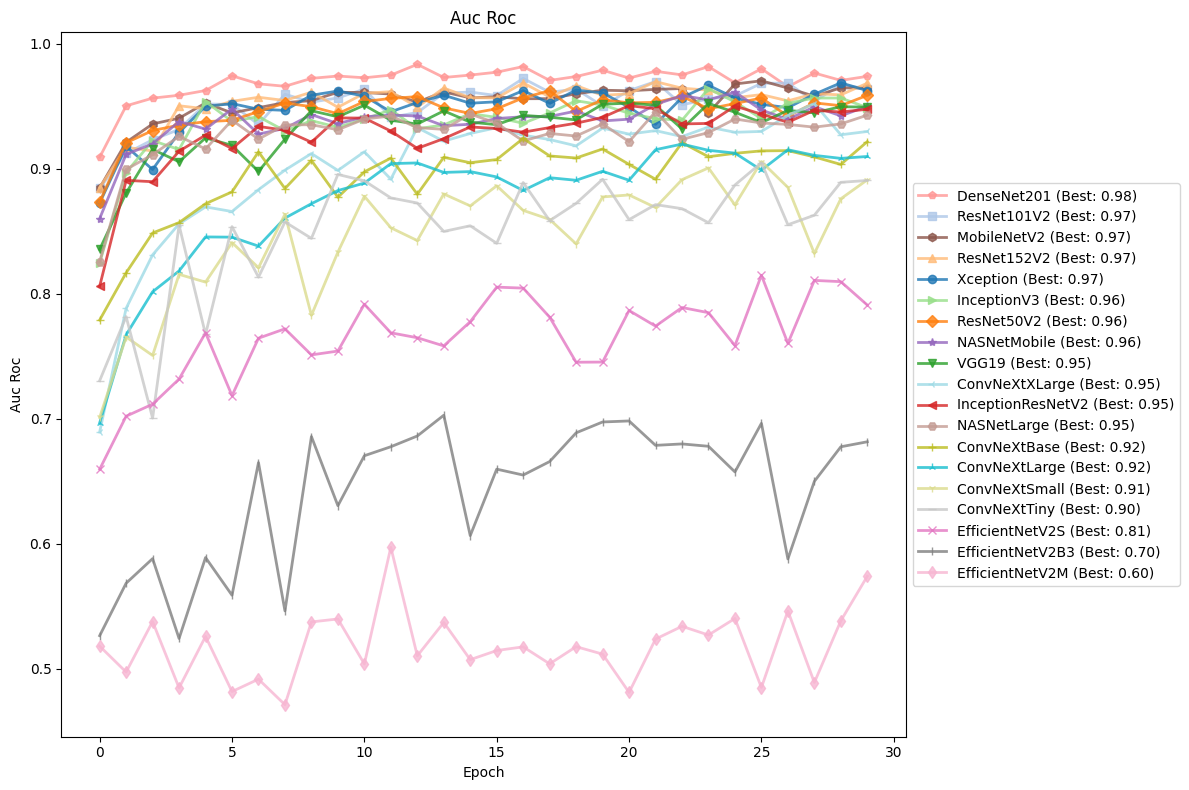

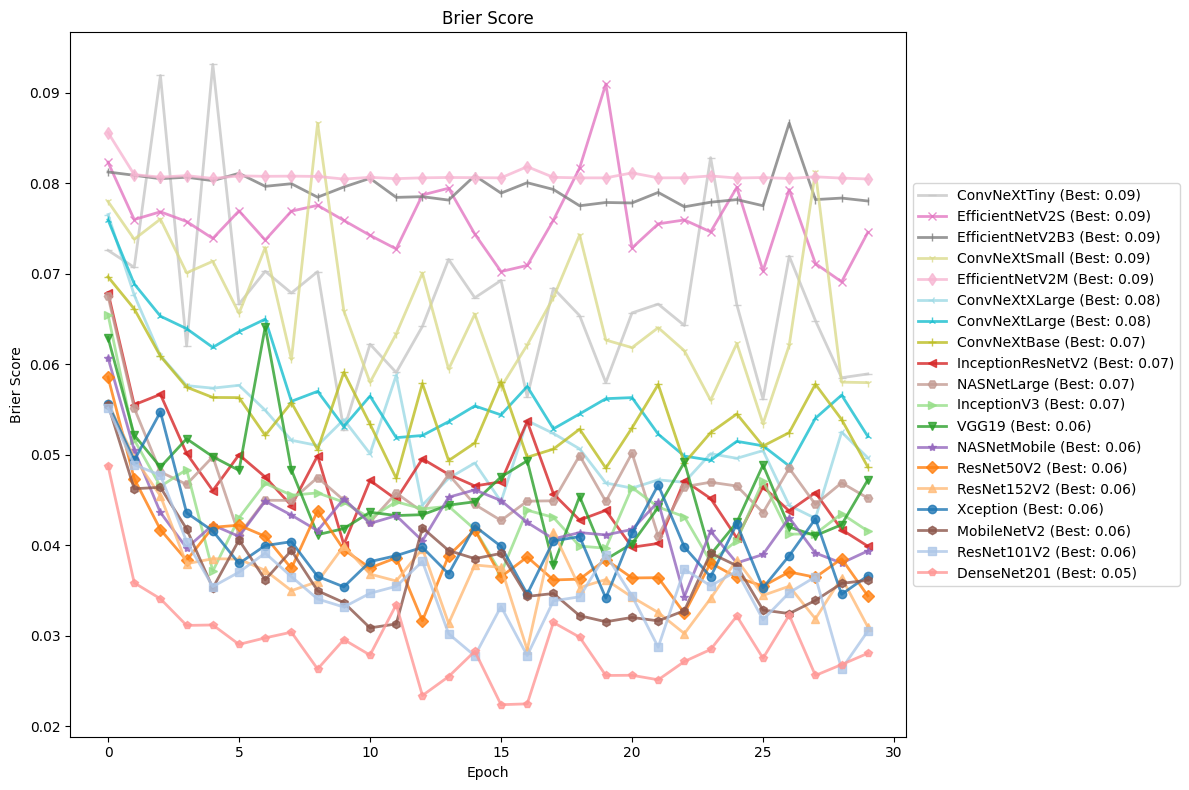

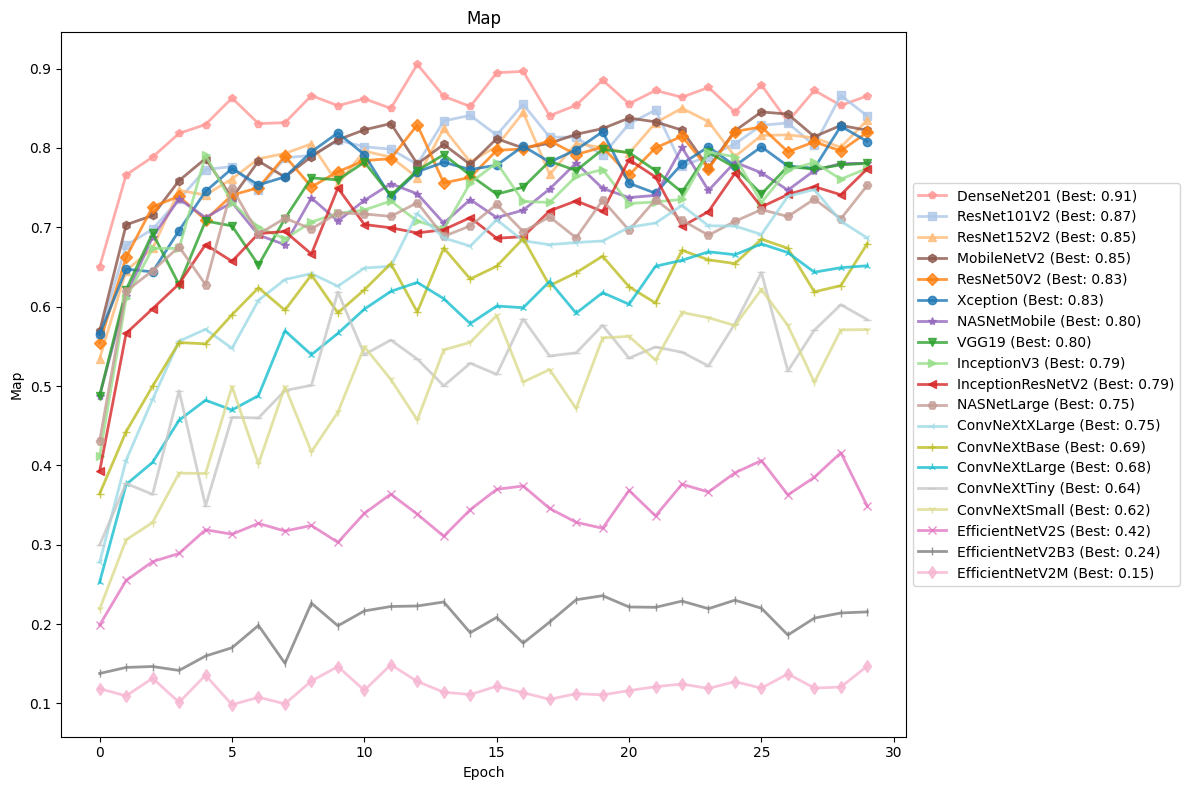

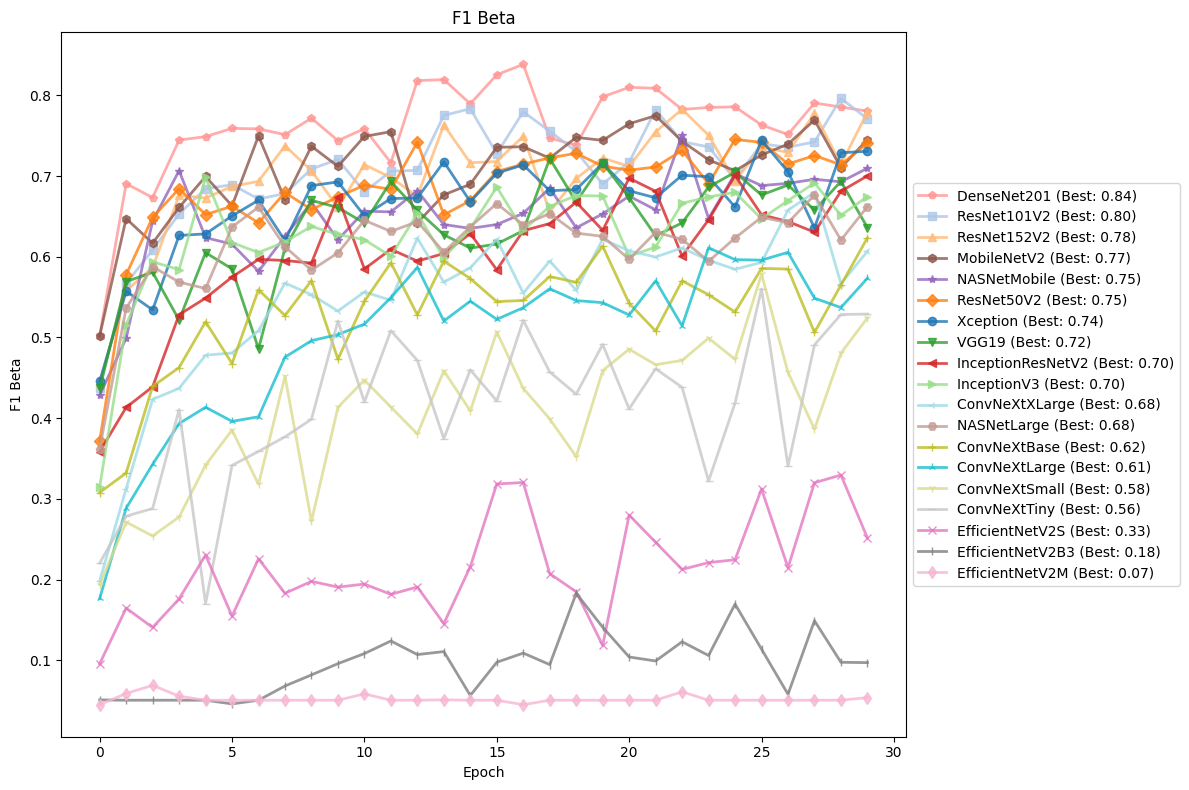

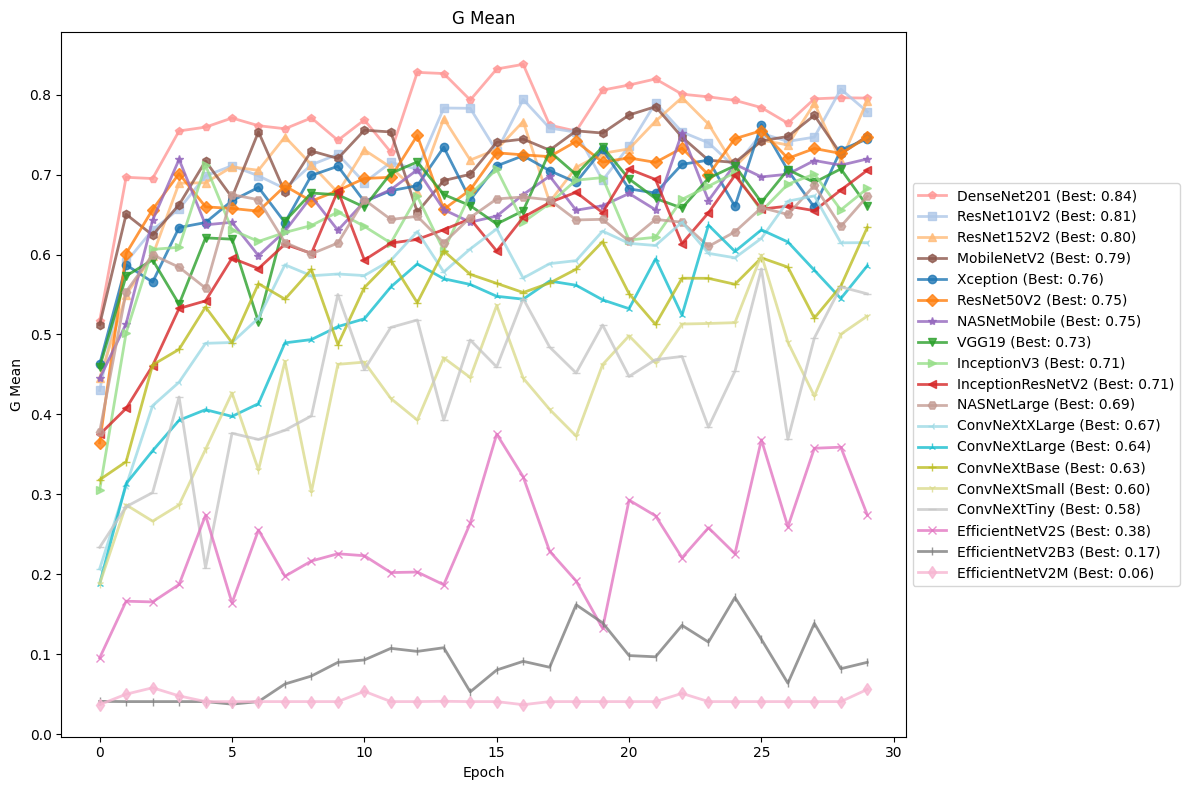

In [ ]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

def read_data_from_files(directory):
    data = []
    file_names = []
    for filename in os.listdir(directory):
        if filename.endswith('.pkl'):
            with open(os.path.join(directory, filename), 'rb') as f:
                data.append(pickle.load(f))
            model_name = filename.replace('.pkl', '')
            model_name = model_name.replace('metrics_', '')
            file_names.append(model_name)
    return data, file_names

def aggregate_metrics(data):
    metrics = ['train_acc', 'train_loss', 'precision', 'recall', 'val_loss', 'test_acc',
               'test_loss', 'val_accuracy', 'f1_score', 'mcc', 'cohen_kappa', 'hamming_loss',
               'zero_one_loss', 'auc_roc', 'brier_score', 'mAP', 'f1_beta', 'g_mean']

    averaged_metrics = {metric: [] for metric in metrics}

    for file_data in data:
        for metric in metrics:
            if metric in file_data:
                metric_values = file_data[metric]
                if isinstance(metric_values[0], list):
                    averaged_values = [np.mean(epoch_values) for epoch_values in metric_values]
                    averaged_metrics[metric].append(averaged_values)
                else:
                    averaged_metrics[metric].append(metric_values)

    return averaged_metrics

def plot_metrics(aggregated_data, file_names):
    colormap = plt.cm.get_cmap('tab20', len(file_names))
    markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'H', 'x', 'd', '|', '_', '+', '1', '2', '3', '4']

    for metric, values in aggregated_data.items():
        plt.figure(figsize=(12, 8))
        legend_labels = []

        # Determine the best value and corresponding model for each metric
        best_values = []
        for value_list in values:
            if 'loss' in metric.lower():  # For loss, lower is better
                best_epoch = np.argmin(value_list)
                best_value = value_list[best_epoch]
            else:  # For accuracy and other metrics, higher is better
                best_epoch = np.argmax(value_list)
                best_value = value_list[best_epoch]
            best_values.append(best_value)

        # Sort models by their best value
        sorted_indices = np.argsort(best_values) if 'loss' in metric.lower() else np.argsort(best_values)[::-1]

        for i in sorted_indices:
            value_list = values[i]

            # Plot the metric
            plt.plot(
                value_list,
                label=file_names[i],
                color=colormap(i),
                marker=markers[i % len(markers)],
                markersize=6,
                linewidth=2,
                alpha=0.8
            )

            # Update legend label with the best value
            legend_labels.append(f'{file_names[i]} (Best: {best_values[i]:.2f})')

        # Simplify the metric name for the plot title and labels
        metric_label = metric.replace('_', ' ').title()
        plt.title(metric_label)
        plt.xlabel('Epoch')
        plt.ylabel(metric_label)

        # Update the legend with the best values
        plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

        # Adjust layout manually to ensure everything fits
        plt.tight_layout()
        plt.show()


# Directory containing your pickle files
data_directory = '/content/drive/MyDrive/ProjetoCurso'

# Read data from files
data, file_names = read_data_from_files(data_directory)

# Aggregate data by metrics
aggregated_data = aggregate_metrics(data)

# Plot the metrics
plot_metrics(aggregated_data, file_names)


<ipython-input-4-a55a71a469b7>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(aggregated_data))


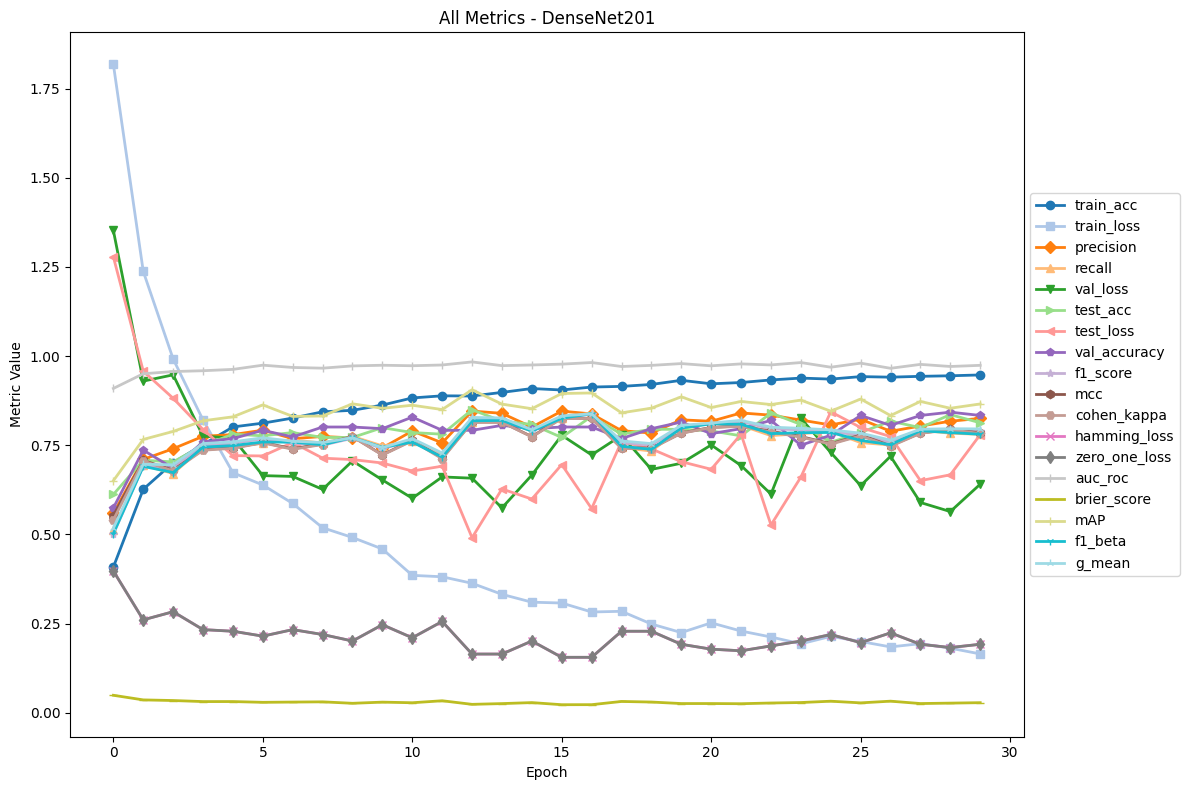

In [ ]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

def read_data_from_files(directory):
    data = []
    file_names = []
    for filename in os.listdir(directory):
        if filename.endswith('.pkl'):
            with open(os.path.join(directory, filename), 'rb') as f:
                data.append(pickle.load(f))
            file_names.append(filename)
    return data, file_names

def aggregate_metrics(data):
    metrics = ['train_acc', 'train_loss', 'precision', 'recall', 'val_loss', 'test_acc',
               'test_loss', 'val_accuracy', 'f1_score', 'mcc', 'cohen_kappa', 'hamming_loss',
               'zero_one_loss', 'auc_roc', 'brier_score', 'mAP', 'f1_beta', 'g_mean']

    averaged_metrics = {metric: [] for metric in metrics}

    for file_data in data:
        for metric in metrics:
            if metric in file_data:
                metric_values = file_data[metric]
                if isinstance(metric_values[0], list):
                    averaged_values = [np.mean(epoch_values) for epoch_values in metric_values]
                    averaged_metrics[metric].append(averaged_values)
                else:
                    averaged_metrics[metric].append(metric_values)

    return averaged_metrics

def plot_all_metrics_on_one_graph(aggregated_data, file_name):
    plt.figure(figsize=(12, 8))

    # Define distinct colors and markers
    colors = plt.cm.get_cmap('tab20', len(aggregated_data))
    markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'H', 'x', 'd', '|', '_', '+', '1', '2', '3', '4']

    for i, (metric, values) in enumerate(aggregated_data.items()):
        plt.plot(values[0], label=metric, color=colors(i), marker=markers[i % len(markers)], linewidth=2)

    plt.title(f'All Metrics - {file_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Metric Value')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

# Directory containing your pickle files
data_directory = '/content/drive/MyDrive/ProjetoCurso'

# Read data from files
data, file_names = read_data_from_files(data_directory)

# Aggregate data by metrics
aggregated_data = aggregate_metrics(data)

# Plot all metrics for DenseNet201 on the same graph
densenet201_index = file_names.index('metrics_DenseNet201.pkl')
densenet201_data = {metric: [values[densenet201_index]] for metric, values in aggregated_data.items()}
plot_all_metrics_on_one_graph(densenet201_data, 'DenseNet201')

